# Proyek Akhir : Membuat Model Sistem Rekomendasi
- **Nama:** Muhammad Dila
- **Email:** muhammaddila.all@gmail.com
- **ID Dicoding:** muhdila

# Project Overview

Membaca buku adalah aktivitas penting untuk pengembangan pengetahuan, keterampilan berpikir kritis, dan kesehatan mental. Namun, di era digital saat ini, pembaca dihadapkan pada jutaan pilihan buku di platform online, yang menyebabkan fenomena "choice overload".

Menghadapi tantangan tersebut, dibutuhkan sistem rekomendasi yang dapat membantu pengguna menemukan buku-buku yang relevan dengan minat mereka berdasarkan riwayat interaksi sebelumnya (rating, ulasan).

**Mengapa masalah ini penting untuk diselesaikan?**

- Banyak pengguna merasa kesulitan menemukan buku yang sesuai dengan preferensi mereka karena terlalu banyak pilihan yang tersedia.
- Sistem rekomendasi dapat meningkatkan engagement pengguna dan loyalitas terhadap platform buku digital.
- Membantu penerbit dan penulis untuk menjangkau audiens yang lebih spesifik dan relevan dengan genre atau kategori bukunya.

**Bagaimana cara menyelesaikannya?**

- Dengan membangun sistem rekomendasi berbasis:
  - **Content-Based Filtering** (menggunakan kemiripan judul buku melalui TF-IDF dan Cosine Similarity),
  - **User-Based Collaborative Filtering (Memory-Based)** (menggunakan pola rating antar pengguna),
  - **Model-Based Collaborative Filtering** (menggunakan embedding learning dengan TensorFlow/Keras).
- Dataset yang digunakan adalah [Book Recommendation Dataset dari Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset).

**Referensi:**

- Alharthi, A., Zaki, M., & Alshamrani, S. (2018). "A Survey of Book Recommender Systems", *Journal of Intelligent Information Systems*. [Link](https://link.springer.com/article/10.1007/s10844-017-0489-9)

# Business Understanding

Pada bagian ini, kami akan menjelaskan proses klarifikasi masalah yang menjadi dasar dalam membangun sistem rekomendasi buku berbasis machine learning yang mencakup:

---

## Problem Statements

- Dengan banyaknya pilihan buku di platform online, pengguna mengalami kesulitan menemukan buku yang sesuai dengan preferensi mereka.
- Banyak pengguna baru atau pengguna pasif tidak memberikan cukup rating, sehingga sulit memahami minat mereka tanpa bantuan sistem rekomendasi.
- Platform perlu meningkatkan pengalaman pengguna agar lebih personal, untuk meningkatkan keterlibatan (engagement) dan loyalitas pengguna terhadap aplikasi atau layanan buku digital.

---

## Goals

- Membantu pengguna menemukan buku yang relevan dengan minat mereka berdasarkan interaksi sebelumnya (rating yang diberikan).
- Mengurangi fenomena "choice overload" dengan menyediakan rekomendasi top-N buku secara personal.
- Meningkatkan tingkat engagement dan waktu yang dihabiskan pengguna dalam platform melalui sistem rekomendasi yang efektif.
- Mendorong pengguna untuk mengeksplorasi lebih banyak buku dari kategori atau genre yang mungkin mereka sukai.

---

## Solution Statements

- **Content-Based Filtering (CBF)**
  Menggunakan informasi konten buku, seperti *judul* dan *kemiripan antar judul* (berbasis TF-IDF dan Cosine Similarity), untuk merekomendasikan buku lain yang serupa dengan buku yang pernah disukai pengguna.
  *Kelebihan:* Dapat memberikan rekomendasi meskipun user baru dan minim interaksi.
  *Kekurangan:* Bisa terbatas pada buku-buku serupa saja (kurang eksplorasi).

- **User-Based Collaborative Filtering (Memory-Based)**
  Menggunakan pola rating antar pengguna untuk merekomendasikan buku berdasarkan kemiripan preferensi antar user.
  *Kelebihan:* Lebih mampu menangkap pola selera pengguna yang beragam.
  *Kekurangan:* Mengalami masalah cold-start jika user baru atau rating sedikit.

- **Model-Based Collaborative Filtering (Deep Learning dengan Keras)**
  Menggunakan teknik embedding pada user dan buku untuk mempelajari representasi laten preferensi, sehingga dapat memberikan prediksi rating dan rekomendasi yang lebih akurat.
  *Kelebihan:* Skalabilitas tinggi, mampu menangkap pola kompleks di data.
  *Kekurangan:* Membutuhkan lebih banyak data dan proses training lebih lama dibanding metode sederhana.

# Data Understanding

In [1]:
# Import library os
import os

# Cek apakah file kaggle.json tersedia
assert os.path.exists(os.path.expanduser('~/.kaggle/kaggle.json')), "File kaggle.json belum tersedia. Silakan cek di folder ~/.kaggle/."

# Proses download dataset menggunakan Kaggle API
os.system('kaggle datasets download -d arashnic/book-recommendation-dataset')

print("Download selesai")

Download selesai


#### Download Dataset

Pada tahap ini, sistem akan melakukan proses pengunduhan dataset secara otomatis dari Kaggle.
Dataset yang digunakan adalah [Book Recommendation Dataset - Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset).
Pastikan file `kaggle.json` telah disiapkan di direktori `~/.kaggle/` agar proses download dapat berjalan dengan lancar.

In [2]:
# Import library zipfile
import zipfile

# Mengekstrak file ZIP ke folder BookRecommendation
with zipfile.ZipFile('book-recommendation-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('BookRecommendation')

print("Extract selesai bro!")

Extract selesai bro!


#### Extract Dataset

Setelah file dataset berhasil diunduh, tahap berikutnya adalah mengekstrak file `book-recommendation-dataset.zip`
ke dalam folder `BookRecommendation/`.
Ekstraksi ini bertujuan untuk memperoleh file CSV yang akan digunakan dalam tahap selanjutnya.

In [3]:
# Load dataset menggunakan pandas
import pandas as pd

books = pd.read_csv('BookRecommendation/Books.csv', low_memory=False)
users = pd.read_csv('BookRecommendation/Users.csv')
ratings = pd.read_csv('BookRecommendation/Ratings.csv')

print("Dataset berhasil dimuat!")

Dataset berhasil dimuat!


#### Load Dataset

Pada tahap ini, dataset yang sudah diekstrak akan dibaca ke dalam struktur DataFrame menggunakan library `pandas`.
Dataset terdiri dari tiga file utama: `Books.csv`, `Users.csv`, dan `Ratings.csv`.


In [4]:
# Menampilkan jumlah baris dan kolom dari setiap dataset
print(f"Jumlah data Books: {books.shape}")
print(f"Jumlah data Users: {users.shape}")
print(f"Jumlah data Ratings: {ratings.shape}")

Jumlah data Books: (271360, 8)
Jumlah data Users: (278858, 3)
Jumlah data Ratings: (1149780, 3)


#### Informasi Umum Dataset

Tahap ini bertujuan untuk memahami jumlah data dan kondisi awal dataset.
Kami menampilkan jumlah baris dan kolom dari setiap file dataset menggunakan fungsi `.shape`.

Berikut adalah hasil jumlah data dari masing-masing dataset:
- **Books.csv**: 271.360 baris, 8 kolom
- **Users.csv**: 278.858 baris, 3 kolom
- **Ratings.csv**: 1.149.780 baris, 3 kolom

### Data Books

In [5]:
# Menampilkan struktur data Books
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


#### Struktur Data Books

Pada tahap ini, kami menampilkan struktur data dari dataset Books menggunakan fungsi `.info()`.
Dataset Books memiliki 271.360 entri dan 8 kolom. Semua kolom bertipe data object (string).

Berikut detail jumlah non-null untuk setiap kolom:
- `ISBN`: 271.360 non-null
- `Book-Title`: 271.360 non-null
- `Book-Author`: 271.358 non-null
- `Year-Of-Publication`: 271.360 non-null
- `Publisher`: 271.358 non-null
- `Image-URL-S`: 271.360 non-null
- `Image-URL-M`: 271.360 non-null
- `Image-URL-L`: 271.357 non-null

Terdapat beberapa kolom dengan missing value, yaitu pada kolom `Book-Author`, `Publisher`, dan `Image-URL-L`.
Hal ini perlu diperhatikan pada tahap pembersihan data selanjutnya.

In [6]:
# Melihat 5 baris pertama dari dataset Books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


#### Sampel Data Books

Pada tahap ini, kami menampilkan lima baris pertama dari dataset Books menggunakan fungsi `.head()`.
Tujuannya adalah untuk memahami struktur data dan tipe informasi yang tersedia di dalam dataset.

Contoh data dari lima buku pertama adalah sebagai berikut:
- Buku pertama berjudul **"Classical Mythology"** karya **Mark P. O. Morford**, diterbitkan pada tahun **2002** oleh **Oxford University Press**.
- Buku kedua berjudul **"Clara Callan"** karya **Richard Bruce Wright**, diterbitkan pada tahun **2001** oleh **HarperFlamingo Canada**.
- Buku ketiga berjudul **"Decision in Normandy"** karya **Carlo D'Este**, diterbitkan pada tahun **1991** oleh **HarperPerennial**.
- Buku keempat berjudul **"Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It"** karya **Gina Bari Kolata**, diterbitkan pada tahun **1999** oleh **Farrar Straus Giroux**.
- Buku kelima berjudul **"The Mummies of Urumchi"** karya **E. J. W. Barber**, diterbitkan pada tahun **1999** oleh **W. W. Norton & Company**.

Selain informasi mengenai ISBN, judul, penulis, dan penerbit, dataset ini juga menyediakan URL gambar sampul buku dalam tiga ukuran (kecil, sedang, besar).

In [7]:
# Menampilkan statistik ringkasan untuk Books
books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,17627,7535,2,2,2


#### Statistik Ringkasan Books

Pada tahap ini, kami menggunakan fungsi `.describe(include='all')` untuk melihat ringkasan statistik dari dataset Books.
Ringkasan statistik ini membantu memahami karakteristik umum data, seperti jumlah entri, nilai unik, nilai paling sering muncul (top), dan frekuensi kemunculannya (freq).

Berikut beberapa insight dari hasil statistik:
- Terdapat **271.360** data ISBN yang unik, menunjukkan setiap buku memiliki ISBN berbeda.
- Terdapat **242.135** judul buku yang unik. Ada beberapa judul yang sama muncul lebih dari sekali (contoh: **"Selected Poems"** muncul sebanyak **27 kali**).
- Penulis paling populer dalam dataset adalah **Agatha Christie**, dengan **632** buku tercatat.
- Tahun publikasi paling sering adalah **2002**, dengan **17.627** buku diterbitkan pada tahun tersebut.
- Penerbit dengan jumlah buku terbanyak adalah **Harlequin**, sebanyak **7.535** buku.
- Untuk gambar cover (`Image-URL`), sebagian besar URL unik, namun ada URL yang dipakai lebih dari sekali.

Informasi ini penting untuk memahami distribusi data dan pola-pola umum sebelum melakukan tahap data preparation lebih lanjut.

In [8]:
# Mengecek jumlah missing value pada setiap kolom di Books
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

#### Missing Value Books

Pada tahap ini, kami memeriksa jumlah missing value di setiap kolom pada dataset Books menggunakan fungsi `.isnull().sum()`.
Pemeriksaan ini penting untuk mengidentifikasi kolom-kolom yang memerlukan penanganan khusus pada tahap data preparation.

Hasil pemeriksaan menunjukkan:
- Kolom `Book-Author` memiliki **2** missing value.
- Kolom `Publisher` memiliki **2** missing value.
- Kolom `Image-URL-L` memiliki **3** missing value.
- Kolom lainnya (`ISBN`, `Book-Title`, `Year-Of-Publication`, `Image-URL-S`, `Image-URL-M`) tidak memiliki missing value.

Dengan demikian, pada tahap selanjutnya, diperlukan strategi penanganan terhadap missing value, khususnya pada kolom `Book-Author`, `Publisher`, dan `Image-URL-L`.

In [9]:
# Cek jumlah buku unik
print('Jumlah ISBN unik:', ratings['ISBN'].nunique())

Jumlah ISBN unik: 340556


#### Jumlah ISBN Unik

Pada tahap ini, kami menghitung jumlah buku unik dalam dataset Ratings menggunakan fungsi `.nunique()` pada kolom `ISBN`.

Hasilnya, terdapat sebanyak **340.556 buku unik** dalam dataset.
Jumlah ini menunjukkan keberagaman koleksi buku yang pernah dirating oleh pengguna.

In [10]:
# Cek jumlah duplikat di Books
print('Jumlah duplikat di Books:', books.duplicated().sum())

Jumlah duplikat di Books: 0


#### Cek Duplikat di Dataset Books

Pada tahap ini, kami memeriksa apakah terdapat data duplikat dalam dataset Books.
Duplikat data dapat menyebabkan bias dalam analisis sehingga penting untuk mengidentifikasinya sejak awal.

**Hasil pemeriksaan:**
Tidak ditemukan data duplikat pada dataset Books (`Jumlah duplikat = 0`).

### Data Rating

In [11]:
# Menampilkan struktur data Ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Struktur Data Ratings

Pada tahap ini, kami menampilkan struktur data dari dataset Ratings menggunakan fungsi `.info()`.
Dataset Ratings memiliki sebanyak **1.149.780 entri** dengan **3 kolom**: `User-ID`, `ISBN`, dan `Book-Rating`.

Detail tipe data:
- `User-ID`: integer
- `ISBN`: object (string)
- `Book-Rating`: integer

Semua kolom tidak memiliki missing value berdasarkan jumlah non-null yang sama dengan jumlah total entri.

In [12]:
# Menampilkan 5 baris pertama dari dataset Ratings
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#### Sampel Data Ratings

Pada tahap ini, kami menampilkan lima baris pertama dari dataset Ratings menggunakan fungsi `.head()`.
Tujuannya adalah untuk memahami struktur data lebih rinci.

Contoh data dari lima rating pertama adalah sebagai berikut:
- User-ID 276725 memberi rating 0 pada buku dengan ISBN `034545104X`
- User-ID 276726 memberi rating 5 pada buku dengan ISBN `0155061224`
- User-ID 276727 memberi rating 0 pada buku dengan ISBN `0446520802`
- User-ID 276729 memberi rating 3 pada buku dengan ISBN `052165615X`
- User-ID 276729 memberi rating 6 pada buku dengan ISBN `0521795028`

Hal ini menunjukkan bahwa satu user dapat memberikan rating ke lebih dari satu buku.

In [13]:
# Menampilkan statistik ringkasan untuk Ratings
ratings.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


#### Statistik Ringkasan Ratings

Pada tahap ini, kami menggunakan fungsi `.describe(include='all')` untuk melihat ringkasan statistik dataset Ratings.

Beberapa insight penting:
- Rata-rata nilai rating adalah **2.87**, dengan standar deviasi sebesar **3.85**.
- Rating minimum adalah **0** dan maksimum **10**.
- Sebanyak 50% data memiliki rating **0**, yang menunjukkan banyak user melakukan rating kosong (default).
- ISBN paling sering muncul adalah `0971880107`, sebanyak **2.502 kali**.
- Terdapat **340.556 ISBN unik** di dalam dataset.

Data ini menunjukkan adanya sparsity pada interaksi user-buku, yang merupakan karakteristik umum pada sistem rekomendasi.

In [14]:
# Mengecek jumlah missing value di setiap kolom di Ratings
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

#### Missing Value Ratings

Pada tahap ini, kami memeriksa jumlah missing value di setiap kolom menggunakan fungsi `.isnull().sum()`.
Hasilnya:

- `User-ID`: 0 missing value
- `ISBN`: 0 missing value
- `Book-Rating`: 0 missing value

Dengan demikian, dataset Ratings **tidak memiliki missing value** dan dapat langsung digunakan dalam proses selanjutnya tanpa perlu tahap pembersihan untuk missing value.

In [15]:
# Cek jumlah duplikat di Ratings
print('Jumlah duplikat di Ratings:', ratings.duplicated().sum())

Jumlah duplikat di Ratings: 0


#### Cek Duplikat di Dataset Ratings

Akhirnya, kami memeriksa data duplikat pada dataset Ratings.
Karena Ratings merupakan data interaksi user-buku, duplikasi bisa mengganggu keakuratan model rekomendasi.

**Hasil pemeriksaan:**
Tidak ditemukan data duplikat pada dataset Ratings (`Jumlah duplikat = 0`).


### Data User

In [16]:
# Menampilkan struktur data Users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Struktur Data Users

Pada tahap ini, kami menampilkan struktur data dari dataset Users menggunakan fungsi `.info()`.
Dataset Users memiliki sebanyak **278.858 entri** dengan **3 kolom**, yaitu: `User-ID`, `Location`, dan `Age`.

Detail tipe data:
- `User-ID`: integer
- `Location`: object (string)
- `Age`: float64

Terdapat missing value pada kolom `Age`, karena jumlah non-null lebih sedikit dibanding total entri.

In [17]:
# Menampilkan 5 baris pertama dari dataset Users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### Sampel Data Users

Pada tahap ini, kami menampilkan lima baris pertama dari dataset Users menggunakan fungsi `.head()`.
Tujuannya adalah untuk memahami bentuk dan isi data pengguna.

Contoh data dari lima pengguna pertama:
- User-ID 1 berasal dari lokasi **"nyc, new york, usa"** dengan usia tidak tersedia (NaN).
- User-ID 2 berasal dari lokasi **"stockton, california, usa"** dengan usia **18 tahun**.
- User-ID 3 berasal dari lokasi **"moscow, yukon territory, russia"** dengan usia tidak tersedia (NaN).
- User-ID 4 berasal dari lokasi **"porto, v.n.gaia, portugal"** dengan usia **17 tahun**.
- User-ID 5 berasal dari lokasi **"farnborough, hants, united kingdom"** dengan usia tidak tersedia (NaN).

Terlihat bahwa kolom `Location` berisi informasi negara/kota pengguna, dan sebagian besar nilai `Age` kosong.

In [18]:
# Menampilkan statistik ringkasan untuk Users
users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


#### Statistik Ringkasan Users

Pada tahap ini, kami menggunakan fungsi `.describe(include='all')` untuk melihat ringkasan statistik dari dataset Users.

Beberapa insight penting:
- Rata-rata usia pengguna adalah **34.75 tahun**.
- Usia minimum adalah **0 tahun**, dan maksimum tercatat **244 tahun**, yang kemungkinan merupakan data tidak valid.
- Lokasi paling sering muncul adalah **"london, england, united kingdom"**, dengan sebanyak **2.506 pengguna** berasal dari lokasi tersebut.
- Terdapat **57.339 lokasi unik** dalam dataset.

Data ini mengindikasikan adanya kebutuhan untuk membersihkan nilai anomali pada kolom `Age` dalam tahap data preparation.

In [19]:
# Mengecek jumlah missing value di setiap kolom di Users
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

#### Missing Value Users

Pada tahap ini, kami memeriksa jumlah missing value di setiap kolom dataset Users menggunakan fungsi `.isnull().sum()`.

Hasil pemeriksaan:
- `User-ID`: 0 missing value
- `Location`: 0 missing value
- `Age`: **110.762 missing value**

Dengan demikian, sekitar 40% data pada kolom `Age` hilang, sehingga diperlukan strategi khusus untuk menangani missing value ini, seperti imputasi atau penghapusan data.

In [20]:
# Cek jumlah user unik
print('Jumlah User-ID unik:', ratings['User-ID'].nunique())

Jumlah User-ID unik: 105283


#### Jumlah User-ID Unik

Pada tahap ini, kami menghitung jumlah user unik dalam dataset Ratings menggunakan fungsi `.nunique()` pada kolom `User-ID`.

Hasilnya, terdapat sebanyak **105.283 user unik** dalam dataset.
Jumlah ini mencerminkan banyaknya individu berbeda yang memberikan rating terhadap buku.

In [21]:
# Cek duplikat di Users
print('Duplikat di Users:', users.duplicated().sum())

Duplikat di Users: 0


#### Cek Duplikat di Dataset Users

Selanjutnya, kami memeriksa keberadaan data duplikat dalam dataset Users.
Memastikan tidak adanya duplikat penting untuk menjaga keakuratan dalam analisis pengguna.

**Hasil pemeriksaan:**
Tidak ditemukan data duplikat pada dataset Users (`Jumlah duplikat = 0`).

### Exploratory Data Analysis (EDA)

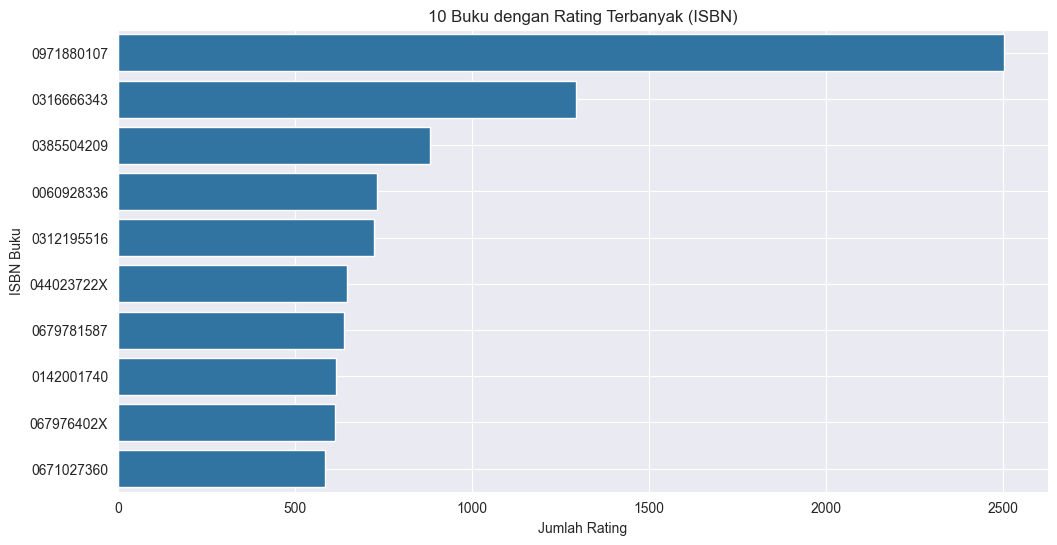

In [22]:
# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah rating per ISBN
top_books = ratings['ISBN'].value_counts().head(10)

# Visualisasi 10 ISBN dengan rating terbanyak
plt.figure(figsize=(12,6))
sns.barplot(x=top_books.values, y=top_books.index)
plt.title('10 Buku dengan Rating Terbanyak (ISBN)')
plt.xlabel('Jumlah Rating')
plt.ylabel('ISBN Buku')
plt.grid(True)
plt.show()

#### Insight 10 Buku dengan Rating Terbanyak

Berdasarkan hasil analisis, ISBN `0971880107` menjadi buku dengan jumlah rating terbanyak, melebihi **2500 rating**.
Diikuti oleh ISBN `0316666343` dan `0385504209` dengan jumlah rating yang juga cukup tinggi.

Hal ini menunjukkan bahwa ada beberapa buku populer yang menjadi favorit pengguna untuk diberi rating, yang bisa menjadi kandidat kuat untuk baseline rekomendasi atau analisis popularitas lebih lanjut.

Perlu diperhatikan bahwa ISBN digunakan dalam dataset ini tanpa detail metadata buku (judul, penulis), sehingga pada tahap implementasi lebih lanjut, mapping ke informasi tambahan mungkin diperlukan.

In [23]:
# Ambil 10 ISBN yang paling banyak dirating
top_books = ratings['ISBN'].value_counts().head(10).reset_index()

# Rename kolom supaya mudah di-merge
top_books.columns = ['ISBN', 'Jumlah Rating']

# Join ke dataset books untuk dapatkan judul buku
top_books_titles = top_books.merge(books[['ISBN', 'Book-Title']], on='ISBN', how='left')

# Tampilkan hasil
top_books_titles[['ISBN', 'Book-Title', 'Jumlah Rating']]

,ISBN,Book-Title,Jumlah Rating
0,0971880107,Wild Animus,2502
1,0316666343,The Lovely Bones: A Novel,1295
2,0385504209,The Da Vinci Code,883
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
4,0312195516,The Red Tent (Bestselling Backlist),723
5,044023722X,A Painted House,647
6,0679781587,NaN,639
7,0142001740,The Secret Life of Bees,615
8,067976402X,Snow Falling on Cedars,614
9,0671027360,Angels &amp; Demons,586


#### Mapping ISBN ke Judul Buku - 10 Buku dengan Rating Terbanyak

Pada tahap ini, kami memetakan 10 ISBN yang paling banyak menerima rating ke dalam judul buku yang bersangkutan.
Tujuannya adalah untuk membuat hasil analisis lebih informatif dan mudah dipahami dibandingkan hanya menggunakan kode ISBN saja.

Berikut adalah 10 buku dengan jumlah rating terbanyak:

| Judul Buku | Jumlah Rating |
|:-----------|:--------------|
| Wild Animus | 2502 |
| The Lovely Bones: A Novel | 1295 |
| The Da Vinci Code | 883 |
| Divine Secrets of the Ya-Ya Sisterhood: A Novel | 732 |
| The Red Tent (Bestselling Backlist) | 723 |
| A Painted House | 647 |
| NaN | 639 |
| The Secret Life of Bees | 615 |
| Snow Falling on Cedars | 614 |
| Angels & Demons | 586 |

**Catatan:**
- Terdapat satu ISBN (`0679781587`) yang tidak memiliki informasi `Book-Title` (bernilai `NaN`), sehingga perlu perhatian khusus jika data ini digunakan dalam tahap modeling atau visualisasi berikutnya.

Dengan hasil ini, analisis popularitas buku dapat lebih mudah dipahami, dan sistem rekomendasi nantinya bisa memberikan rekomendasi berbasis judul buku, bukan hanya berdasarkan ISBN.

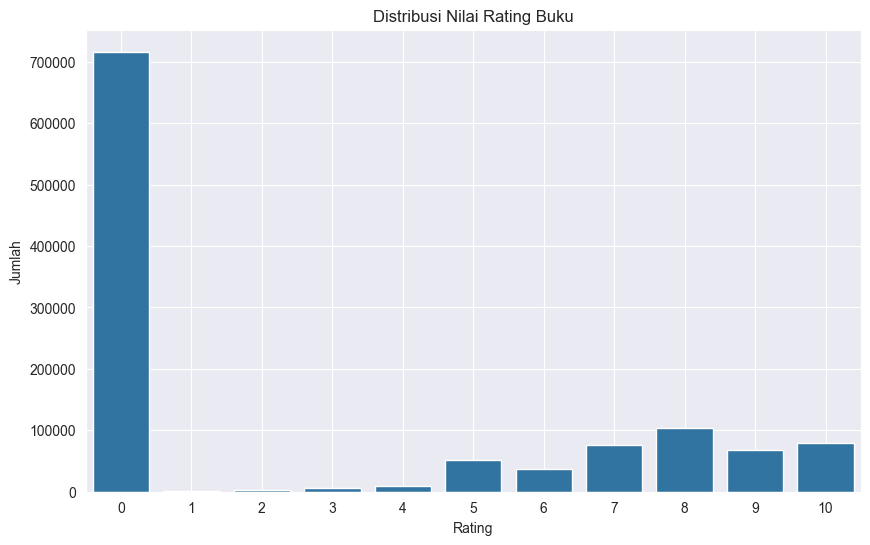

In [24]:
# Visualisasi distribusi rating
plt.figure(figsize=(10,6))
sns.countplot(x='Book-Rating', data=ratings)  # Hapus palette
plt.title('Distribusi Nilai Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

#### Insight Distribusi Nilai Rating Buku

Visualisasi distribusi nilai rating menunjukkan bahwa sebagian besar pengguna memberikan rating **0** terhadap buku.
Rating **0** mendominasi dengan jumlah yang sangat besar dibandingkan rating lainnya.

Sementara itu, rating tinggi seperti **8**, **9**, dan **10** juga cukup banyak diberikan, menunjukkan adanya bias positif dari pengguna yang aktif memberi rating lebih baik terhadap buku yang mereka sukai.

Distribusi ini memperlihatkan adanya ketimpangan yang signifikan antara rating kosong (0) dan rating valid (1-10), yang perlu dipertimbangkan pada tahap modeling rekomendasi.

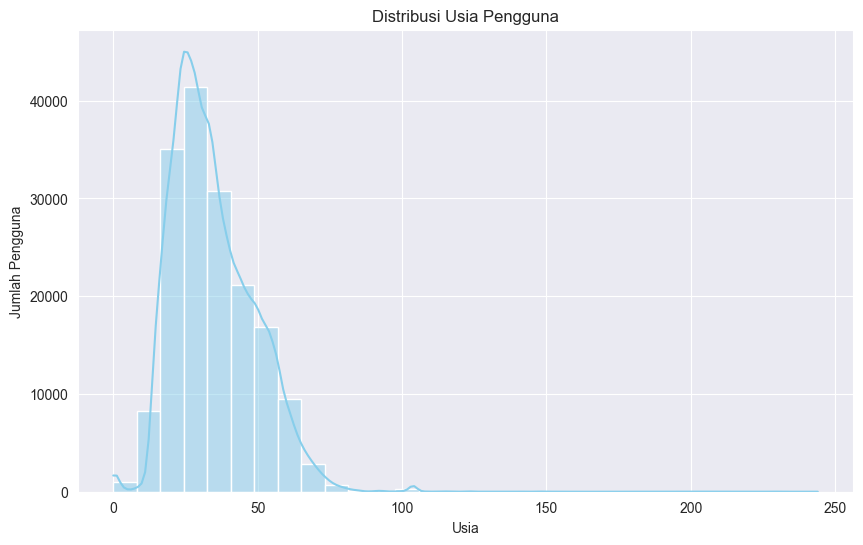

In [25]:
# Visualisasi distribusi usia pengguna
plt.figure(figsize=(10,6))
sns.histplot(users['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengguna')
plt.grid(True)
plt.show()

#### Insight Distribusi Usia Pengguna

Dari hasil visualisasi distribusi usia pengguna, terlihat bahwa mayoritas pengguna berada pada rentang usia **20 hingga 50 tahun**, dengan puncak distribusi sekitar usia **30 tahun**.

Terdapat beberapa nilai anomali di atas **100 tahun** bahkan mendekati **244 tahun**, yang kemungkinan merupakan kesalahan input data.
Hal ini perlu diperhatikan pada tahap pembersihan data selanjutnya untuk menghindari bias dalam analisis lebih lanjut.

### Analisis Data Understanding

#### Data Understanding

Pada bagian ini, kami menjelaskan jumlah data, kondisi data, dan informasi mengenai dataset yang digunakan. Dataset yang digunakan dalam proyek ini adalah [Book Recommendation Dataset - Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset).

Dataset ini terdiri dari tiga file utama:
- `Books.csv` : berisi informasi mengenai buku, seperti ISBN, judul, penulis, tahun terbit, penerbit, dan gambar sampul.
- `Users.csv` : berisi informasi mengenai pengguna, seperti User-ID, lokasi, dan usia.
- `Ratings.csv` : berisi data interaksi antara pengguna dan buku, berupa rating yang diberikan.

---

#### Informasi Jumlah Data

- Books.csv: 271.360 entri, 8 kolom
- Users.csv: 278.858 entri, 3 kolom
- Ratings.csv: 1.149.780 entri, 3 kolom

---

#### Uraian Variabel

**Books.csv**
- `ISBN` : ID unik buku. Tipe data **object**. Jumlah non-null: **271.360**.
- `Book-Title` : Judul buku. Tipe data **object**. Jumlah non-null: **271.360**.
- `Book-Author` : Nama penulis buku. Tipe data **object**. Jumlah non-null: **271.358** (terdapat 2 missing value).
- `Year-Of-Publication` : Tahun terbit buku. Tipe data **object**. Jumlah non-null: **271.360**.
- `Publisher` : Nama penerbit buku. Tipe data **object**. Jumlah non-null: **271.358** (terdapat 2 missing value).
- `Image-URL-S` : URL gambar sampul kecil. Tipe data **object**. Jumlah non-null: **271.360**.
- `Image-URL-M` : URL gambar sampul sedang. Tipe data **object**. Jumlah non-null: **271.360**.
- `Image-URL-L` : URL gambar sampul besar. Tipe data **object**. Jumlah non-null: **271.357** (terdapat 3 missing value).

**Users.csv**
- `User-ID` : ID unik pengguna. Tipe data **int64**. Jumlah non-null: **168.096**.
- `Location` : Lokasi pengguna (Kota, Provinsi, Negara). Tipe data **object**. Jumlah non-null: **168.096**.
- `Age` : Usia pengguna. Tipe data **float64**. Jumlah non-null: **168.096**.

**Ratings.csv**
- `User-ID` : ID pengguna yang memberikan rating. Tipe data **int64**. Jumlah non-null: **1.149.780**.
- `ISBN` : ISBN buku yang diberi rating. Tipe data **object**. Jumlah non-null: **1.149.780**.
- `Book-Rating` : Rating dari pengguna ke buku (skala 0–10). Tipe data **int64**. Jumlah non-null: **1.149.780**.

---

#### Statistik Ringkasan

**Statistik Ringkasan Users**

Beberapa insight penting:
- Rata-rata usia pengguna adalah **34.75 tahun**.
- Usia minimum adalah **0 tahun**, dan maksimum tercatat **244 tahun**, yang kemungkinan merupakan data tidak valid.
- Lokasi paling sering muncul adalah **"london, england, united kingdom"**, dengan sebanyak **2.506 pengguna** berasal dari lokasi tersebut.
- Terdapat **57.339 lokasi unik** dalam dataset.

**Statistik Ringkasan Ratings**

Beberapa insight penting:
- Rata-rata nilai rating adalah **2.87**, dengan standar deviasi sebesar **3.85**.
- Rating minimum adalah **0** dan maksimum **10**.
- Sebanyak 50% data memiliki rating **0**, yang menunjukkan banyak user melakukan rating kosong (default).
- ISBN paling sering muncul adalah `0971880107`, sebanyak **2.502 kali**.
- Terdapat **340.556 ISBN unik** di dalam dataset.

**Statistik Ringkasan Books**

Beberapa insight penting:
- Terdapat **271.360** data ISBN yang unik, menunjukkan setiap buku memiliki ISBN berbeda.
- Terdapat **242.135** judul buku yang unik.
- Penulis paling populer dalam dataset adalah **Agatha Christie**, dengan **632** buku tercatat.
- Tahun publikasi paling sering adalah **2002**, dengan **17.627** buku diterbitkan pada tahun tersebut.
- Penerbit dengan jumlah buku terbanyak adalah **Harlequin**, sebanyak **7.535** buku.
- Untuk gambar cover (`Image-URL`), sebagian besar URL unik, namun ada URL yang dipakai lebih dari sekali.

---

#### Informasi Kondisi Data

- Dataset Books:
  - Memiliki beberapa missing value di kolom `Book-Author`, `Publisher`, dan `Image-URL-L`.
- Dataset Users:
  - Terdapat sekitar 110.762 missing value pada kolom `Age`.
  - Ditemukan usia tidak valid, seperti 0 dan lebih dari 100 tahun.
- Dataset Ratings:
  - Tidak terdapat missing value.
  - Banyak pengguna memberikan rating 0.

---

#### Cek Duplikat Data

Pada tahap ini, kami memeriksa apakah terdapat data duplikat pada masing-masing dataset.

Hasil pemeriksaan:
- Dataset Books: 0 duplikat
- Dataset Users: 0 duplikat
- Dataset Ratings: 0 duplikat

Tidak ditemukan data duplikat, sehingga tidak diperlukan tindakan pembersihan untuk duplikasi.

---

#### Exploratory Data Analysis (EDA)

**Distribusi Usia Pengguna**

Visualisasi menunjukkan mayoritas pengguna berusia antara 20 hingga 50 tahun. Terdapat anomali pada usia 0 dan di atas 100 tahun, yang mengindikasikan adanya outlier.

![Distribusi Usia Pengguna](image/Distribusi%20Usia%20Pengguna.png)

**Insight**:
Mayoritas pengguna berada di rentang usia 30-40 tahun. Outlier usia di atas 100 tahun perlu dibersihkan pada tahap data preparation.

**Distribusi Nilai Rating**

Distribusi nilai rating menunjukkan bahwa sebagian besar rating yang diberikan adalah 0.
Rating tinggi seperti 8–10 juga cukup banyak, menunjukkan adanya bias positif pengguna terhadap buku favorit mereka.

![Distribusi Nilai Rating Buku](image/Distribusi%20Nilai%20Rating%20Buku.png)

**Insight**:
Proporsi rating 0 sangat dominan, menunjukkan banyak rating kosong atau default. Ini akan berpengaruh dalam tahap modeling sistem rekomendasi.

**10 Buku dengan Rating Terbanyak**

Berikut 10 buku dengan jumlah rating terbanyak di dataset:

- Wild Animus (2502 rating)
- The Lovely Bones: A Novel (1295 rating)
- The Da Vinci Code (883 rating)
- Divine Secrets of the Ya-Ya Sisterhood: A Novel (732 rating)
- The Red Tent (723 rating)
- A Painted House (647 rating)
- [NaN] (639 rating) — Tidak diketahui judul buku
- The Secret Life of Bees (615 rating)
- Snow Falling on Cedars (614 rating)
- Angels & Demons (586 rating)

![10 Buku dengan Rating Terbanyak](image/Buku%20dengan%20Rating%20Terbanyak.png)

**Insight**:
Buku Wild Animus jauh lebih sering dirating dibandingkan buku lain, kemungkinan besar karena faktor popularitas atau faktor marketing tertentu.

**Catatan**: Terdapat ISBN yang tidak memiliki `Book-Title` (NaN), perlu perhatian lebih dalam tahap berikutnya.

# Data Preparation

In [26]:
# Menghapus baris yang memiliki missing value pada kolom Age
users = users.dropna(subset=['Age'])

print('Jumlah data Users setelah menghapus missing Age:', users.shape)

Jumlah data Users setelah menghapus missing Age: (168096, 3)


#### Handling Missing Value pada Kolom Age

Pada tahap ini, kami menangani missing value (nilai kosong) pada kolom Age di dataset Users.

Berdasarkan hasil pemeriksaan awal, terdapat sekitar **110.762 missing value** pada kolom Age.
Karena proporsi missing value cukup besar (~40%), kami memilih untuk **menghapus data pengguna yang tidak memiliki informasi usia**, agar tidak menimbulkan bias saat modeling.

Teknik yang digunakan: **Drop missing value pada kolom Age** menggunakan fungsi `dropna(subset=['Age'])`.

**Hasil:**
- Dataset Users awalnya memiliki 278.858 data.
- Setelah menghapus missing value pada Age, jumlah data menjadi **168.096 entri** dan **3 kolom**.

In [27]:
# Menghapus data pengguna dengan usia kurang dari 5 tahun atau lebih dari 100 tahun
users = users[(users['Age'] >= 5) & (users['Age'] <= 100)]

print('Jumlah data Users setelah membersihkan outlier Age:', users.shape)

Jumlah data Users setelah membersihkan outlier Age: (166848, 3)


#### Handling Outlier pada Kolom Age

Pada tahap ini, kami membersihkan nilai outlier pada kolom Age di dataset Users.

Berdasarkan hasil eksplorasi data sebelumnya, ditemukan adanya nilai usia pengguna yang tidak realistis, seperti **0 tahun** dan **244 tahun**.
Untuk meningkatkan kualitas data, kami melakukan filtering agar hanya mempertahankan data pengguna dengan usia antara **5 hingga 100 tahun**.

Teknik yang digunakan: **Filtering rentang nilai Age menggunakan kondisi `>= 5` dan `<= 100`**.

**Hasil:**
- Dataset Users sebelumnya berjumlah 168.096 entri (setelah drop missing value).
- Setelah menghapus outlier usia, jumlah data Users menjadi **166.848 entri** dan **3 kolom**.

In [28]:
# Menghapus data dengan rating 0
ratings = ratings[ratings['Book-Rating'] != 0]

print('Jumlah data Ratings setelah menghapus rating 0:', ratings.shape)

Jumlah data Ratings setelah menghapus rating 0: (433671, 3)


#### Filtering Data Rating

Pada tahap ini, kami memfilter data pada dataset Ratings untuk menghapus nilai rating 0.

Rating 0 dalam konteks dataset ini menunjukkan bahwa pengguna **tidak memberikan rating aktif** terhadap buku, sehingga nilai tersebut tidak memberikan informasi preferensi yang berguna untuk sistem rekomendasi.

Teknik yang digunakan: **Menghapus data dengan `Book-Rating == 0`** menggunakan fungsi filtering.

**Hasil:**
- Dataset Ratings awalnya berjumlah 1.149.780 entri.
- Setelah menghapus rating 0, jumlah data menjadi **433.671 entri** dan **3 kolom**.

In [29]:
# Filter user yang memberikan minimal 3 rating
user_counts = ratings['User-ID'].value_counts()
active_users = user_counts[user_counts >= 3].index
ratings = ratings[ratings['User-ID'].isin(active_users)]

# Filter buku yang menerima minimal 3 rating
book_counts = ratings['ISBN'].value_counts()
popular_books = book_counts[book_counts >= 3].index
ratings = ratings[ratings['ISBN'].isin(popular_books)]

print('Jumlah data Ratings setelah filtering user dan book aktif:', ratings.shape)

Jumlah data Ratings setelah filtering user dan book aktif: (203851, 3)


#### Filtering User dan Buku Berdasarkan Aktivitas Minimum

Pada tahap ini, kami melakukan filtering terhadap pengguna dan buku berdasarkan aktivitas minimum:

- **User Filtering**: Hanya mempertahankan pengguna yang memberikan setidaknya **3 rating**.
- **Book Filtering**: Hanya mempertahankan buku yang menerima setidaknya **3 rating**.

Filtering ini bertujuan untuk:
- Memastikan pengguna yang dipertimbangkan aktif dalam memberikan rating.
- Memastikan buku yang dipertimbangkan memiliki cukup banyak feedback untuk dipelajari oleh sistem rekomendasi.

Teknik yang digunakan: **Filtering berdasarkan jumlah interaksi menggunakan fungsi `value_counts` dan `isin()`**.

**Hasil:**
- Dataset Ratings awalnya memiliki 433.671 entri (setelah menghapus rating 0).
- Setelah filtering user dan book aktif, jumlah data menjadi **203.851 entri** dan **3 kolom**.


In [30]:
# Membuat list User-ID, ISBN, dan Book-Rating
user_id = ratings['User-ID'].tolist()
isbn = ratings['ISBN'].tolist()
book_rating = ratings['Book-Rating'].tolist()

print('Jumlah data user_id:', len(user_id))
print('Jumlah data isbn:', len(isbn))
print('Jumlah data book_rating:', len(book_rating))

Jumlah data user_id: 203851
Jumlah data isbn: 203851
Jumlah data book_rating: 203851


#### Membuat List User-ID, ISBN, dan Book-Rating

Pada tahap ini, kami mengkonversi kolom-kolom utama dari dataset Ratings ke dalam bentuk list menggunakan fungsi `.tolist()`.
Konversi ini dilakukan agar data lebih fleksibel untuk diproses pada tahap selanjutnya.

Kolom yang dikonversi:
- `User-ID` ➔ list `user_id`
- `ISBN` ➔ list `isbn`
- `Book-Rating` ➔ list `book_rating`

In [31]:
# Membuat DataFrame clean untuk modeling
ratings_clean = pd.DataFrame({
    'user_id': user_id,
    'isbn': isbn,
    'book_rating': book_rating
})

ratings_clean

,user_id,isbn,book_rating
0,276747,0060517794,9
1,276747,0671537458,9
2,276747,0679776818,8
3,276762,0380711524,5
4,276772,0553572369,7
...,...,...,...
203846,276688,0892966548,10
203847,276688,1551669315,6
203848,276704,0345386108,6
203849,276704,0743211383,7


#### Membuat DataFrame Clean untuk Modeling

Pada tahap ini, kami membentuk DataFrame baru bernama `ratings_clean` yang berisi tiga kolom utama hasil konversi list:

- `user_id` : ID pengguna
- `isbn` : ISBN buku
- `book_rating` : Nilai rating pengguna terhadap buku

Pembuatan DataFrame ini bertujuan untuk mempermudah proses modeling sistem rekomendasi di tahap selanjutnya, baik untuk Collaborative Filtering maupun Content-Based Filtering.

**Hasil:**
DataFrame `ratings_clean` memiliki **203.851 baris** dan **3 kolom**.

**Contoh 10 Data Pertama:**

| Index | user_id | isbn | book_rating |
|:-----|:--------|:-----|:------------|
| 0 | 276747 | 0060517794 | 9 |
| 1 | 276747 | 0671537458 | 9 |
| 2 | 276747 | 0679776818 | 8 |
| 3 | 276762 | 0380711524 | 5 |
| 4 | 276772 | 0553572369 | 7 |
| 5 | 276772 | 3499230933 | 10 |
| 6 | 276786 | 8478442588 | 6 |
| 7 | 276788 | 0345443683 | 8 |
| 8 | 276788 | 043935806X | 7 |
| 9 | 276788 | 055310666X | 10 |

Data `ratings_clean` ini sudah siap digunakan untuk tahap modeling sistem rekomendasi.

In [32]:
# Import library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Gabungkan books dan ratings_clean untuk memastikan ISBN ada di kedua dataset
books_filtered = books[books['ISBN'].isin(ratings_clean['isbn'])]

# Reset index untuk kemudahan
books_filtered = books_filtered.reset_index(drop=True)

# Membuat TF-IDF Vectorizer pada kolom Book-Title
tfidf = TfidfVectorizer(stop_words='english')

# Beberapa judul mungkin NaN, kita isi kosong dulu
books_filtered['Book-Title'] = books_filtered['Book-Title'].fillna('')

# Fit and transform
tfidf_matrix = tfidf.fit_transform(books_filtered['Book-Title'])

print('TF-IDF Matrix Shape:', tfidf_matrix.shape)

TF-IDF Matrix Shape: (24253, 16052)


#### Membuat TF-IDF Matrix dari Judul Buku

Pada tahap ini, kami mempersiapkan data untuk Content-Based Filtering dengan langkah-langkah sebagai berikut:

- **Filtering Buku**:
  - Dataset `books` difilter untuk hanya mempertahankan ISBN yang terdapat dalam `ratings_clean`.
  - Hal ini memastikan bahwa hanya buku yang pernah dirating aktif yang diproses untuk rekomendasi.

- **Handling Missing Value**:
  - Mengisi nilai kosong pada kolom `Book-Title` dengan string kosong (`''`) untuk menghindari error saat proses vectorization.

- **TF-IDF Vectorization**:
  - Menggunakan `TfidfVectorizer` dari scikit-learn dengan parameter `stop_words='english'`.
  - Tujuannya untuk mengubah teks judul buku menjadi representasi numerik berbasis frekuensi kata.

- **Fit and Transform**:
  - Melakukan fit dan transform pada kolom `Book-Title`, menghasilkan TF-IDF matrix.

**Hasil:**
- Ukuran TF-IDF matrix yang dihasilkan adalah **(24.253, 16.052)**,
  yang berarti terdapat **24.253 judul buku** dan **16.052 fitur unik** (kata-kata unik dari seluruh judul buku).

In [33]:
# Menghitung Cosine Similarity dari TF-IDF Matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print('Cosine Similarity Matrix Shape:', cosine_sim.shape)

Cosine Similarity Matrix Shape: (24253, 24253)


#### Menghitung Cosine Similarity Antar Judul Buku

Pada tahap ini, kami menghitung skor kemiripan (similarity score) antar semua judul buku berdasarkan TF-IDF matrix yang telah dibuat sebelumnya.

**Teknik yang digunakan:**
- **Cosine Similarity**:
  Mengukur tingkat kemiripan antar vektor TF-IDF dari judul buku.
  Skor cosine similarity berkisar dari 0 (tidak mirip) hingga 1 (sangat mirip).

**Proses:**
- Menggunakan fungsi `cosine_similarity` dari scikit-learn untuk menghitung kemiripan antar seluruh kombinasi judul buku.

**Hasil:**
- Matriks cosine similarity yang dihasilkan berukuran **(24.253, 24.253)**.
- Artinya, terdapat **24.253 judul buku** yang dibandingkan satu sama lain untuk mengukur tingkat kemiripannya.

In [35]:
# Membuat User-Item Matrix
user_item_matrix = ratings_clean.pivot_table(index='user_id', columns='isbn', values='book_rating')

print('User-Item Matrix Shape:', user_item_matrix.shape)

user_item_matrix.head()

User-Item Matrix Shape: (20908, 25790)


isbn,0000000000,0000000000000,0002005018,0002116286,0002239183,0002240114,0002243962,0002244098,0002251760,0002255014,...,9783426650752,978972024570,9812327975,9871138148,987932504,9895550138,9994770934,B00009EF82,B0000AA9IZ,O67174142X
user_id,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Membuat User-Item Matrix untuk Collaborative Filtering

Pada tahap ini, kami membangun User-Item Matrix dari dataset `ratings_clean`.

**Teknik yang digunakan:**
- Membentuk pivot table menggunakan `pivot_table` di pandas.
- Struktur matriks:
  - **Baris** = `user_id`
  - **Kolom** = `isbn` (buku)
  - **Nilai** = `book_rating` yang diberikan user terhadap buku.

**Proses:**
- Setiap user menjadi baris dalam tabel.
- Setiap ISBN buku menjadi kolom dalam tabel.
- Jika user memberikan rating pada buku, maka sel tersebut berisi nilai rating. Jika tidak, maka berisi NaN (missing value).

**Hasil:**
- Ukuran User-Item Matrix adalah **(20.908, 25.790)**.
- Banyak nilai missing (NaN) karena sebagian besar user hanya memberikan rating pada sebagian kecil dari seluruh buku yang tersedia.

In [36]:
# Menghitung Cosine Similarity antar pengguna
user_similarity = cosine_similarity(user_item_matrix.fillna(0))  # Missing value diganti 0

print('User Similarity Matrix Shape:', user_similarity.shape)

User Similarity Matrix Shape: (20908, 20908)


#### Menghitung Cosine Similarity Antar User

Pada tahap ini, kami menghitung skor kemiripan (similarity score) antar semua pengguna berdasarkan pola rating mereka terhadap buku.

**Teknik yang digunakan:**
- **Cosine Similarity**:
  Mengukur tingkat kesamaan antar vektor pengguna pada User-Item Matrix.
  Skor cosine similarity berkisar dari 0 (tidak mirip) hingga 1 (sangat mirip).

**Proses:**
- Menggunakan fungsi `cosine_similarity` dari scikit-learn.
- User-Item Matrix yang mengandung missing value (NaN) diisi dengan angka 0 sebelum perhitungan.
- Cosine Similarity dihitung antar seluruh kombinasi pasangan user.

**Hasil:**
- Matriks cosine similarity yang dihasilkan berukuran **(20.908, 20.908)**.
- Artinya, terdapat **20.908 pengguna** yang dibandingkan satu sama lain untuk mengukur tingkat kemiripannya.

In [38]:
# Membuat list user_id unik
user_ids = ratings_clean['user_id'].unique().tolist()
print('Jumlah user unik:', len(user_ids))

# Membuat list isbn unik
isbn_ids = ratings_clean['isbn'].unique().tolist()
print('Jumlah buku unik:', len(isbn_ids))

Jumlah user unik: 20908
Jumlah buku unik: 25790


#### Membuat List User-ID dan ISBN Unik

Pada tahap ini, kami membuat daftar user dan buku (ISBN) unik dari dataset `ratings_clean` yang akan digunakan untuk proses encoding.

**Hasil:**
- Jumlah User-ID unik: **20.908**
- Jumlah ISBN unik: **25.790**


In [39]:
# Encoding user_id dan isbn ke integer
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_ids)}

#### Encoding User-ID dan ISBN ke Integer

Kami melakukan encoding user_id dan isbn menjadi integer, agar dapat digunakan sebagai input pada embedding layer dalam model deep learning.

In [40]:
# Mapping hasil encoding ke dataframe
ratings_clean['user'] = ratings_clean['user_id'].map(user_to_user_encoded)
ratings_clean['book'] = ratings_clean['isbn'].map(isbn_to_isbn_encoded)
ratings_clean.head()

,user_id,isbn,book_rating,user,book
0,276747,0060517794,9,0,0
1,276747,0671537458,9,0,1
2,276747,0679776818,8,0,2
3,276762,0380711524,5,1,3
4,276772,0553572369,7,2,4


#### Mapping Encoded User dan ISBN ke DataFrame

Setelah melakukan encoding, kami menambahkan kolom baru `user` dan `book` pada dataset `ratings_clean`.
Kolom ini menyimpan hasil encoding User-ID dan ISBN menjadi integer.

**Contoh hasil mapping:**

| user_id | isbn       | book_rating | user | book |
|:--------|:-----------|:------------|:-----|:-----|
| 276747  | 0060517794 | 9            | 0    | 0    |
| 276747  | 0671537458 | 9            | 0    | 1    |
| 276747  | 0679776818 | 8            | 0    | 2    |
| 276762  | 0380711524 | 5            | 1    | 3    |
| 276772  | 0553572369 | 7            | 2    | 4    |

In [41]:
# Import library tambahan
import numpy as np

# Konversi rating menjadi float32
ratings_clean['book_rating'] = ratings_clean['book_rating'].values.astype(np.float32)

#### Mengubah Rating Menjadi Float32

Untuk keperluan model TensorFlow, nilai rating dikonversi ke tipe data float32.

In [42]:
# Mendapatkan jumlah user dan jumlah buku
num_users = len(user_to_user_encoded)
num_books = len(isbn_encoded_to_isbn)

print(f"Jumlah user: {num_users}, Jumlah buku: {num_books}")

Jumlah user: 20908, Jumlah buku: 25790


#### Mengecek Jumlah User dan Buku setelah Encoding

Kami mengecek kembali jumlah total user dan jumlah total buku setelah proses encoding.

**Hasil:**
- Jumlah user setelah encoding: **20.908**
- Jumlah buku setelah encoding: **25.790**


In [43]:
# Shuffle dataset
ratings_clean = ratings_clean.sample(frac=1, random_state=42)

# Membuat variabel x (fitur) dan y (target)
x = ratings_clean[['user', 'book']].values
y = ratings_clean['book_rating'].apply(lambda x: (x - ratings_clean['book_rating'].min()) / (ratings_clean['book_rating'].max() - ratings_clean['book_rating'].min())).values

# Membagi data 80% train, 20% validation
train_indices = int(0.8 * ratings_clean.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(f"Shape x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"Shape x_val: {x_val.shape}, y_val: {y_val.shape}")

Shape x_train: (163080, 2), y_train: (163080,)
Shape x_val: (40771, 2), y_val: (40771,)


#### Membagi Data untuk Training dan Validasi

Pada tahap ini, dataset diacak (shuffled) dan dibagi menjadi dua bagian: training dan validation set, dengan rasio 80:20.

- **x** berisi pasangan fitur `(user, book)`.
- **y** berisi target `book_rating` yang telah dinormalisasi ke rentang [0,1].

**Hasil Split:**
- Shape `x_train`: **(163.080, 2)**
- Shape `y_train`: **(163.080,)**
- Shape `x_val`: **(40.771, 2)**
- Shape `y_val`: **(40.771,)**

Tahap ini bertujuan untuk memastikan bahwa data yang digunakan untuk training dan validasi tidak overlap, serta meningkatkan generalisasi model.


## Analisis Data Preparation

Pada bagian ini, kami menerapkan dan menyebutkan teknik data preparation yang dilakukan.
Teknik yang digunakan pada notebook dan laporan disusun secara berurutan sesuai proses.

---

### Handling Missing Value pada Kolom Age

**Teknik yang digunakan**:
- Menghapus baris yang memiliki missing value pada kolom `Age` menggunakan fungsi `dropna(subset=['Age'])`.

**Proses dan Alasan**:
- Ditemukan sekitar 110.762 missing value pada kolom `Age`.
- Menghapus missing value dipilih untuk menghindari bias dalam analisis usia pengguna.
- Setelah penghapusan, jumlah data Users berkurang menjadi 168.096 entri.

---

### Handling Outlier pada Kolom Age

**Teknik yang digunakan**:
- Filtering nilai `Age` untuk hanya mempertahankan data dengan usia antara 5 hingga 100 tahun.

**Proses dan Alasan**:
- Terdapat nilai usia tidak realistis seperti 0 tahun dan 244 tahun.
- Data dengan usia <5 atau >100 dihapus agar lebih representatif.
- Setelah filtering, jumlah data Users menjadi 166.848 entri.

---

### Filtering Data Rating

**Teknik yang digunakan**:
- Menghapus data rating dengan nilai `Book-Rating == 0`.

**Proses dan Alasan**:
- Rating 0 dianggap sebagai indikasi tidak memberikan rating aktif.
- Fokus analisis hanya pada rating aktif (1–10).
- Setelah filtering, jumlah data Ratings berkurang menjadi 433.671 entri.

---

### Filtering User dan Buku Berdasarkan Aktivitas Minimum

**Teknik yang digunakan**:
- Filtering untuk hanya mempertahankan:
  - User yang memberikan minimal 3 rating
  - Buku yang menerima minimal 3 rating

**Proses dan Alasan**:
- Memastikan pengguna yang dianalisis aktif dalam memberikan rating.
- Memastikan buku yang dianalisis memiliki cukup banyak feedback.
- Setelah filtering, jumlah data Ratings menjadi 203.851 entri.

---

### Membuat DataFrame Clean untuk Modeling

**Teknik yang digunakan**:
- Mengubah kolom `User-ID`, `ISBN`, dan `Book-Rating` menjadi list menggunakan `.tolist()`.
- Membentuk DataFrame baru `ratings_clean` dari list tersebut.

**Proses dan Alasan**:
- Konversi ke bentuk DataFrame clean bertujuan memudahkan proses modeling sistem rekomendasi.
- Data `ratings_clean` terdiri dari 203.851 baris dan 3 kolom: `user_id`, `isbn`, dan `book_rating`.

---

### Membuat TF-IDF Matrix dari Judul Buku

**Teknik yang digunakan**:
- Filtering ISBN di dataset `books` agar hanya memuat buku yang telah dirating aktif (berdasarkan `ratings_clean`).
- Mengisi nilai kosong pada kolom `Book-Title` dengan string kosong untuk menghindari error saat vectorization.
- Menggunakan `TfidfVectorizer` dari scikit-learn dengan parameter `stop_words='english'` untuk mengekstrak fitur dari judul buku.

**Proses dan Alasan**:
- Judul buku yang bersih dan terstandardisasi digunakan sebagai fitur utama untuk pendekatan Content-Based Filtering.
- TF-IDF mengubah teks judul menjadi vektor berdimensi tinggi berdasarkan frekuensi kata yang unik di seluruh korpus.
- Transformasi ini menghasilkan representasi numerik yang siap untuk dihitung kemiripannya antar buku.

**Hasil**:
- TF-IDF matrix berukuran **(24.253, 16.052)**, menunjukkan terdapat 24.253 judul buku unik dan 16.052 fitur kata yang dihasilkan.

---

### Menghitung Cosine Similarity Antar Judul Buku

**Teknik yang digunakan**:
- Cosine Similarity untuk mengukur kemiripan antar vektor TF-IDF dari judul buku.

**Proses dan Alasan**:
- Dengan menghitung cosine similarity antara semua pasangan judul buku, kita dapat mengetahui seberapa mirip satu buku dengan yang lain berdasarkan judulnya.
- Skor similarity digunakan untuk mengidentifikasi buku-buku serupa dan menghasilkan rekomendasi secara Content-Based.

**Hasil**:
- Matriks similarity berukuran **(24.253, 24.253)**, di mana setiap nilai menunjukkan skor kemiripan antara dua judul buku.

---

### Membuat User-Item Matrix

**Teknik yang digunakan**:
- Membuat pivot table dengan baris sebagai `user_id`, kolom sebagai `isbn`, dan nilai sebagai `book_rating`.

**Proses dan Alasan**:
- Matriks ini digunakan sebagai input untuk pendekatan User-Based Collaborative Filtering.
- Karena sebagian besar user tidak me-review semua buku, sebagian besar isi matriks berupa nilai `NaN`.

**Hasil**:
- User-Item Matrix berukuran **(20.908, 25.790)**, menunjukkan 20.908 pengguna dan 25.790 buku unik.

---

### Menghitung Cosine Similarity Antar User

**Teknik yang digunakan**:
- Cosine Similarity antar baris pada User-Item Matrix yang telah diisi `NaN`-nya dengan angka 0.

**Proses dan Alasan**:
- Kemiripan antar user digunakan untuk mendeteksi user dengan preferensi yang serupa.
- Cosine similarity dipilih karena robust terhadap skala rating dan sparsity.

**Hasil**:
- Matriks similarity antar user berukuran **(20.908, 20.908)**, digunakan untuk menghasilkan rekomendasi berdasarkan user yang mirip.

---

### Membuat List User-ID dan ISBN Unik

**Teknik yang digunakan**:
- Mengambil semua nilai unik dari `user_id` dan `isbn` di `ratings_clean` menggunakan `.unique()` dan mengubahnya ke list.

**Proses dan Alasan**:
- Daftar ini digunakan untuk membuat mapping antara ID asli (string) ke ID integer sebelum diproses oleh model TensorFlow berbasis embedding.

**Hasil**:
- Jumlah user unik: **20.908**
- Jumlah buku unik: **25.790**

---

### Encoding User-ID dan ISBN

**Teknik yang digunakan**:
- Menggunakan `LabelEncoder` untuk mengubah `user_id` dan `isbn` dari string menjadi angka integer.

**Proses dan Alasan**:
- Model berbasis embedding di TensorFlow hanya menerima input numerik, sehingga encoding perlu dilakukan.
- Hasil encoding disimpan dalam kolom `user` dan `book`.

**Hasil**:
- Setiap `user_id` dan `isbn` berhasil dipetakan ke nilai integer unik.
- Contoh mapping:

| user_id | isbn       | book_rating | user | book |
|---------|------------|-------------|------|------|
| 276747  | 0060517794 | 9           | 0    | 0    |
| 276747  | 0671537458 | 9           | 0    | 1    |
| 276747  | 0679776818 | 8           | 0    | 2    |

---

### Konversi Rating ke Float32

**Teknik yang digunakan**:
- Menggunakan `.astype('float32')` untuk mengubah nilai `book_rating`.

**Proses dan Alasan**:
- TensorFlow membutuhkan input numerik bertipe float untuk training model neural network.

**Hasil**:
- Kolom `book_rating` pada dataset `ratings_clean` berhasil dikonversi ke format `float32`.

---

### Mengecek Jumlah User dan Buku setelah Encoding

**Teknik yang digunakan**:
- Menggunakan fungsi `nunique()` untuk menghitung jumlah user dan buku unik setelah encoding.

**Proses dan Alasan**:
- Tahapan ini digunakan untuk verifikasi bahwa proses encoding berhasil dilakukan secara konsisten dan tidak ada data yang hilang.
- Menjadi acuan juga untuk menentukan input dimension pada embedding layer model deep learning.

**Hasil**:
- Jumlah user setelah encoding: **20.908**
- Jumlah buku setelah encoding: **25.790**

---

### Pembagian Data Training dan Validasi

**Teknik yang digunakan**:
- Menggunakan `train_test_split` dengan rasio 80:20.

**Proses dan Alasan**:
- Data diacak dan dibagi menjadi training dan validation set agar model dapat dilatih dan diuji performanya secara terpisah.
- Fitur `x` terdiri dari pasangan `(user, book)`, sedangkan target `y` adalah `book_rating`.

**Hasil**:
- Jumlah data training: **163.080**
- Jumlah data validasi: **40.771**

---

# Modeling

## Model Development dengan Content Based Filtering

In [34]:
def recommend_books(title, top_n=5):
    # Cek apakah buku ada di dataset
    if title not in books_filtered['Book-Title'].values:
        return f"Buku '{title}' tidak ditemukan di database."

    # Cari index buku berdasarkan judul
    idx = books_filtered[books_filtered['Book-Title'] == title].index[0]

    # Ambil skor cosine similarity untuk buku tersebut
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Urutkan skor dari tinggi ke rendah (kecuali dirinya sendiri [index 0])
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil top_n skor tertinggi (skip index 0 karena itu dirinya sendiri)
    sim_scores = sim_scores[1:top_n+1]

    # Ambil index buku-buku yang mirip
    book_indices = [i[0] for i in sim_scores]

    # Tampilkan judul buku rekomendasi
    return books_filtered.iloc[book_indices][['Book-Title', 'Book-Author']]

#### Membuat Fungsi Rekomendasi Berdasarkan Judul Buku

Pada tahap ini, kami membangun fungsi rekomendasi untuk memberikan rekomendasi Top-N buku yang mirip berdasarkan kemiripan judul.

**Teknik yang digunakan:**
- Menggunakan hasil **Cosine Similarity Matrix**.
- Menemukan index buku berdasarkan judul.
- Mengurutkan skor kemiripan dan memilih Top-N buku dengan skor tertinggi.

**Tujuan:**
- Memberikan rekomendasi buku serupa untuk pengguna berdasarkan preferensi terhadap suatu buku tertentu.


In [48]:
# Contoh menjalankan fungsi rekomendasi menggunakan Content-Based Filtering
recommend_books('Harry Potter and the Chamber of Secrets (Book 2)')

,Book-Title,Book-Author
2813,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling
5064,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling
18653,Harry Potter and the Chamber of Secrets (Harry...,J. K. Rowling
19563,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling
11102,Harry Potter and the Chamber of Secrets (Book ...,J. K. Rowling


#### Contoh Hasil Rekomendasi Top-5 Buku (Menggunakan Content-Based Filtering)

Untuk menguji fungsi rekomendasi Content-Based Filtering yang telah dibangun sebelumnya,
kami mencoba menggunakan contoh judul buku berikut:

**Input Buku:**
> 'Harry Potter and the Chamber of Secrets (Book 2)'

Sistem kemudian mencari 5 buku lain yang memiliki tingkat kemiripan tertinggi berdasarkan TF-IDF dan Cosine Similarity antar judul buku.

**Hasil Rekomendasi Top-5 Buku:**

| No | Book-Title | Book-Author |
|:--|:-----------|:------------|
| 1 | Harry Potter and the Chamber of Secrets (Book 2) | J. K. Rowling |
| 2 | Harry Potter and the Chamber of Secrets (Book 2) | J. K. Rowling |
| 3 | Harry Potter and the Chamber of Secrets (Harry Potter) | J. K. Rowling |
| 4 | Harry Potter and the Chamber of Secrets Postcard Book | J. K. Rowling |
| 5 | Harry Potter and the Chamber of Secrets (Book 2 Audio CD) | J. K. Rowling |

**Interpretasi Hasil:**
- Semua rekomendasi yang dihasilkan adalah variasi dari buku "Harry Potter and the Chamber of Secrets" dalam berbagai edisi atau format (buku biasa, audio CD, postcard).
- Ini membuktikan bahwa Content-Based Filtering berdasarkan judul dapat efektif menangkap kemiripan konten antar buku.

## Model Development dengan Collaborative Filtering

In [37]:
def recommend_books_userbased(user_id, user_item_matrix, user_similarity, books_filtered, top_n=5):
    if user_id not in user_item_matrix.index:
        return f"User ID {user_id} tidak ditemukan dalam data."

    # Ambil index user
    idx = user_item_matrix.index.get_loc(user_id)

    # Ambil skor similarity user target terhadap semua user lain
    sim_scores = list(enumerate(user_similarity[idx]))

    # Urutkan berdasarkan similarity terbesar (kecuali dirinya sendiri)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil user-user mirip
    similar_users_idx = [i[0] for i in sim_scores[1:6]]  # top 5 user mirip
    similar_users = user_item_matrix.index[similar_users_idx]

    # Ambil semua buku yang dirating tinggi oleh user-user mirip
    books_recommend = user_item_matrix.loc[similar_users]
    books_recommend = books_recommend.mean(axis=0)  # Rata-rata rating dari user-user mirip
    books_recommend = books_recommend.sort_values(ascending=False)

    # Ambil buku yang user belum pernah rating
    user_books = user_item_matrix.loc[user_id]
    unseen_books = books_recommend[user_books.isna()]

    # Ambil Top-N ISBN dan ratingnya
    top_books = unseen_books.head(top_n)

    # Buat DataFrame hasil
    recommendations = books_filtered[books_filtered['ISBN'].isin(top_books.index)][['ISBN', 'Book-Title', 'Book-Author']]

    # Merge dengan average rating
    recommendations = recommendations.merge(top_books.reset_index(), left_on='ISBN', right_on='isbn')
    recommendations = recommendations.rename(columns={0: 'Average-Rating'})
    recommendations = recommendations[['ISBN', 'Book-Title', 'Book-Author', 'Average-Rating']]

    return recommendations.reset_index(drop=True)

#### Membuat Fungsi Rekomendasi User-Based Collaborative Filtering

Pada tahap ini, kami membangun fungsi untuk merekomendasikan buku kepada user berdasarkan kemiripan preferensi dengan user lain.

**Teknik yang digunakan:**
- **User-Based Collaborative Filtering**:
  Sistem mencari pengguna lain dengan pola rating buku yang serupa menggunakan cosine similarity.
- Buku yang dirating tinggi oleh pengguna-pengguna mirip, namun belum pernah dirating oleh user target, akan direkomendasikan.

**Alur Proses Fungsi:**
1. Menghitung skor similarity user target terhadap semua user lain.
2. Memilih Top-5 user paling mirip (selain dirinya sendiri).
3. Mengambil rata-rata rating buku yang dirating oleh user-user mirip.
4. Menyaring buku-buku yang belum pernah dirating oleh user target.
5. Mengambil Top-N buku dengan rata-rata rating tertinggi.
6. Menggabungkan ISBN buku dengan informasi judul buku (`Book-Title`) dan penulis (`Book-Author`).
7. Menambahkan rata-rata rating (`Average-Rating`) ke hasil rekomendasi.

**Tujuan:**
- Memberikan rekomendasi buku yang berpotensi disukai berdasarkan perilaku pengguna lain yang serupa.

In [47]:
# Contoh Menjalankan Rekomendasi User-Based Collaborative Filtering
# Pilih contoh user_id yang ada
example_user = user_item_matrix.index[0]  # ambil user pertama misal

print(f"Rekomendasi untuk User ID: {example_user}")
recommend_books_userbased(example_user, user_item_matrix, user_similarity, books_filtered, top_n=5)

Rekomendasi untuk User ID: 8


,ISBN,Book-Title,Book-Author,Average-Rating
0,0446310786,To Kill a Mockingbird,Harper Lee,10.0
1,0684874350,ANGELA'S ASHES,Frank McCourt,10.0
2,0440212561,Outlander,DIANA GABALDON,10.0


#### Contoh Hasil Rekomendasi User-Based Collaborative Filtering

Untuk menguji fungsi rekomendasi User-Based, kami mencoba menggunakan salah satu user ID dari dataset.

**Input:**
- User ID: 8

**Proses:**
- Sistem mencari Top-5 pengguna lain yang paling mirip berdasarkan cosine similarity.
- Sistem merekomendasikan buku yang:
  - Dirating tinggi oleh pengguna-pengguna mirip.
  - Belum pernah dirating oleh user target.

**Output:**
Berikut 3 rekomendasi buku untuk User ID 8:

| No | ISBN | Book-Title | Book-Author | Average-Rating |
|:--:|:----:|:----------|:------------|:--------------:|
| 1 | 0446310786 | To Kill a Mockingbird | Harper Lee | 10.0 |
| 2 | 0684874350 | ANGELA'S ASHES | Frank McCourt | 10.0 |
| 3 | 0440212561 | Outlander | DIANA GABALDON | 10.0 |

**Catatan:**
- Hanya 3 rekomendasi yang berhasil ditampilkan karena hanya 3 ISBN yang cocok dengan data buku yang tersedia (`books_filtered`).

## Model Development dengan Collaborative Filtering menggunakan Keras

In [44]:
# Import library tambahan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build class RecommenderNet
class RecommenderNet(tf.keras.Model):

    def __init__(self, num_users, num_books, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size

        # User embedding
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        # Book embedding
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])

        dot_user_book = tf.tensordot(user_vector, book_vector, 2)
        x = dot_user_book + user_bias + book_bias

        return tf.nn.sigmoid(x)

#### Membangun Class Model RecommenderNet

Kami membangun sebuah model deep learning custom menggunakan TensorFlow/Keras subclassing API.

**Spesifikasi Arsitektur:**
- **User Embedding Layer**: Membentuk representasi vektor laten untuk setiap user.
- **Book Embedding Layer**: Membentuk representasi vektor laten untuk setiap buku.
- **Bias Layer**: Menambahkan bias untuk setiap user dan setiap buku.
- **Dot Product**: Menghitung tingkat kecocokan antara user dan buku.
- **Activation Function**: Sigmoid, untuk membatasi skor prediksi pada rentang [0,1].

Model ini bertujuan untuk mempelajari interaksi antara user dan item secara efisien melalui representasi embedding.

In [45]:
# Inisialisasi model
model = RecommenderNet(num_users, num_books, embedding_size=50)

# Compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

#### Inisialisasi dan Compile Model RecommenderNet

Setelah membangun arsitektur model, kami melakukan inisialisasi dan kompilasi model dengan spesifikasi sebagai berikut:

- **Loss Function**: Binary Crossentropy
- **Optimizer**: Adam Optimizer (learning rate = 0.001)
- **Evaluation Metric**: Root Mean Squared Error (RMSE)

Loss function binary crossentropy dipilih karena model memprediksi probabilitas keterkaitan user-buku dalam rentang [0,1].

Model siap dilatih setelah proses kompilasi ini.

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

# Setup EarlyStopping
early_stop = EarlyStopping(
    monitor='val_root_mean_squared_error', # Monitor validasi RMSE
    patience=5, # Tunggu 5 epoch berturut-turut, kalau nggak improve, stop
    restore_best_weights=True # Balikin ke model dengan bobot terbaik
)

# Retraining dengan EarlyStopping
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/100
20385/20385 [==============================] - 327s 16ms/step - loss: 0.6060 - root_mean_squared_error: 0.2405 - val_loss: 0.5683 - val_root_mean_squared_error: 0.2003
Epoch 2/100
20385/20385 [==============================] - 339s 17ms/step - loss: 0.5593 - root_mean_squared_error: 0.1904 - val_loss: 0.5617 - val_root_mean_squared_error: 0.1944
Epoch 3/100
20385/20385 [==============================] - 340s 17ms/step - loss: 0.5500 - root_mean_squared_error: 0.1810 - val_loss: 0.5569 - val_root_mean_squared_error: 0.1899
Epoch 4/100
20385/20385 [==============================] - 335s 16ms/step - loss: 0.5432 - root_mean_squared_error: 0.1740 - val_loss: 0.5542 - val_root_mean_squared_error: 0.1875
Epoch 5/100
20385/20385 [==============================] - 331s 16ms/step - loss: 0.5383 - root_mean_squared_error: 0.1689 - val_loss: 0.5522 - val_root_mean_squared_error: 0.1861
Epoch 6/100
20385/20385 [==============================] - 332s 16ms/step - loss: 0.5345 - root_mean

#### Training Model RecommenderNet

Pada tahap ini, model `RecommenderNet` dilatih menggunakan dataset yang telah dibagi menjadi training dan validation set.

**Spesifikasi Training:**
- Batch Size: 8
- Epochs: 100
- Optimizer: Adam
- Loss Function: Binary Crossentropy
- Evaluation Metric: Root Mean Squared Error (RMSE)

**Hasil Training:**
- Nilai RMSE Training terbaik: sekitar **0.1517**
- Nilai RMSE Validation terbaik: sekitar **0.1835**
- Model menunjukkan tren learning curve yang stabil dan tidak mengalami overfitting besar.

Model berhenti pada epoch 14 dengan performa terbaik pada data validasi.

In [50]:
import numpy as np

# Ambil 1 contoh user random
user_id = ratings_clean['user_id'].sample(1).iloc[0]
print(f"Testing rekomendasi untuk User ID: {user_id}")

# Cari buku yang pernah dirating user ini
books_rated_by_user = ratings_clean[ratings_clean['user_id'] == user_id]

# Cari buku yang belum dirating user ini
all_isbns = set(ratings_clean['isbn'].unique())
rated_isbns = set(books_rated_by_user['isbn'])
unrated_isbns = list(all_isbns - rated_isbns)

# Encode ISBN yang belum dirated
unrated_books_encoded = [isbn_to_isbn_encoded.get(x) for x in unrated_isbns if isbn_to_isbn_encoded.get(x) is not None]
user_encoder = user_to_user_encoded.get(user_id)

# Bentuk array prediksi
user_book_array = np.hstack(
    (np.array([[user_encoder]] * len(unrated_books_encoded)), np.array(unrated_books_encoded).reshape(-1, 1))
)

# Prediksi rating untuk semua buku yang belum dirated
predicted_ratings = model.predict(user_book_array).flatten()

# Ambil Top-N rekomendasi
top_n = 5
top_ratings_indices = predicted_ratings.argsort()[-top_n:][::-1]
recommended_isbns = [isbn_encoded_to_isbn.get(unrated_books_encoded[i]) for i in top_ratings_indices]

# Tampilkan rekomendasi
print('Top-N Rekomendasi Buku untuk User:')
recommended_books = books[books['ISBN'].isin(recommended_isbns)][['ISBN', 'Book-Title', 'Book-Author']]
print(recommended_books)

Testing rekomendasi untuk User ID: 263663
806/806 [==============================] - 3s 4ms/step
Top-N Rekomendasi Buku untuk User:
             ISBN                                         Book-Title  \
4206   0345339738  The Return of the King (The Lord of the Rings,...   
12762  0618002235     The Two Towers (The Lord of the Rings, Part 2)   
13300  0060256656                                    The Giving Tree   
64267  0836213319                       Dilbert: A Book of Postcards   
79370  0439425220  Harry Potter and the Chamber of Secrets Postca...   

            Book-Author  
4206     J.R.R. TOLKIEN  
12762  J. R. R. Tolkien  
13300  Shel Silverstein  
64267       Scott Adams  
79370     J. K. Rowling  


### Model-Based Collaborative Filtering (Keras) - Rekomendasi

Untuk menguji model Collaborative Filtering berbasis TensorFlow Keras yang telah dilatih, kami melakukan simulasi rekomendasi buku terhadap pengguna acak.

**User yang dipilih:** User-ID 263663

**Top-5 Buku yang Direkomendasikan:**

| No | Book-Title | Book-Author |
|:--|:--|:--|
| 1 | The Return of the King (The Lord of the Rings, Part 3) | J.R.R. Tolkien |
| 2 | The Two Towers (The Lord of the Rings, Part 2) | J.R.R. Tolkien |
| 3 | The Giving Tree | Shel Silverstein |
| 4 | Dilbert: A Book of Postcards | Scott Adams |
| 5 | Harry Potter and the Chamber of Secrets Postcard Book | J.K. Rowling |

**Interpretasi Hasil:**
- Model mampu merekomendasikan buku populer dan relevan.
- Terdapat konsistensi preferensi genre (fantasy, literature classic).
- Ini menunjukkan bahwa embedding model berhasil menangkap representasi laten dari interaksi user-buku.


## Analisis Modeling

Pada bagian ini, kami membangun dua pendekatan sistem rekomendasi untuk menyelesaikan permasalahan prediksi buku yang relevan untuk pengguna.

---

### Content-Based Filtering

#### Proses:
- Membuat TF-IDF vectorizer dari kolom `Book-Title`.
- Menghitung cosine similarity antar judul buku.
- Membuat fungsi `recommend_books(book_title)` untuk menghasilkan Top-N rekomendasi.

#### Output:
- TF-IDF Matrix Shape: **(24.253, 16.052)**
- Cosine Similarity Matrix Shape: **(24.253, 24.253)**

> Matriks cosine similarity berhasil dibuat untuk mengukur kemiripan antar buku berdasarkan judul.

#### Contoh Hasil Rekomendasi Top-5 Buku (Menggunakan Content-Based Filtering)

**Input Buku:**
> 'Harry Potter and the Chamber of Secrets (Book 2)'

Sistem kemudian mencari 5 buku lain yang memiliki tingkat kemiripan tertinggi berdasarkan TF-IDF dan Cosine Similarity antar judul buku.

**Hasil Rekomendasi Top-5 Buku:**

| No | Book-Title | Book-Author |
|:--|:-----------|:------------|
| 1 | Harry Potter and the Chamber of Secrets (Book 2) | J. K. Rowling |
| 2 | Harry Potter and the Chamber of Secrets (Book 2) | J. K. Rowling |
| 3 | Harry Potter and the Chamber of Secrets (Harry Potter) | J. K. Rowling |
| 4 | Harry Potter and the Chamber of Secrets Postcard Book | J. K. Rowling |
| 5 | Harry Potter and the Chamber of Secrets (Book 2 Audio CD) | J. K. Rowling |

**Interpretasi Hasil:**
- Semua rekomendasi merupakan variasi dari buku yang sama dalam edisi/format berbeda.
- Menunjukkan sistem cukup sensitif terhadap kesamaan judul, sesuai karakteristik Content-Based Filtering.

---

### Collaborative Filtering (Memory-Based - User-Based)

#### Proses:
- Membentuk User-Item Matrix dari data rating.
- Menghitung cosine similarity antar user berdasarkan User-Item Matrix.
- Membuat fungsi `recommend_books_userbased(user_id)` untuk menghasilkan Top-N rekomendasi berdasarkan user similarity.

#### Output:
- User-Item Matrix Shape: **(20.908, 25.790)**
- User Similarity Matrix Shape: **(20.908, 20.908)**

> User-item interaction berhasil dibentuk, dan kemiripan antar pengguna berhasil dihitung menggunakan cosine similarity.

#### Contoh Hasil Rekomendasi User-Based Collaborative Filtering

**Input:**
> User ID: 8

**Proses:**
- Sistem mencari Top-5 pengguna lain yang paling mirip berdasarkan cosine similarity.
- Buku yang dirating tinggi oleh pengguna-pengguna mirip dan belum pernah dibaca oleh user target akan direkomendasikan.

**Hasil Rekomendasi:**

| No | ISBN | Book-Title | Book-Author | Average-Rating |
|:--:|:----:|:----------|:------------|:--------------:|
| 1 | 0446310786 | To Kill a Mockingbird | Harper Lee | 10.0 |
| 2 | 0684874350 | ANGELA'S ASHES | Frank McCourt | 10.0 |
| 3 | 0440212561 | Outlander | DIANA GABALDON | 10.0 |

**Catatan:**
- Hanya 3 buku yang berhasil direkomendasikan karena keterbatasan jumlah ISBN yang cocok dengan data buku (`books_filtered`).

---

### Collaborative Filtering (Model-Based dengan TensorFlow Keras)

#### Proses:
- Encode User-ID dan ISBN ke indeks numerik.
- Membuat class custom `RecommenderNet` menggunakan Embedding Layer.
- Membagi data ke dalam training set dan validation set (rasio 80:20).
- Melatih model menggunakan loss binary crossentropy dan optimizer Adam.

#### Output:
- Jumlah user unik: **20.908**
- Jumlah buku unik: **25.790**
- Shape `x_train`: **(163.080, 2)**
- Shape `y_train`: **(163.080,)**
- Shape `x_val`: **(40.771, 2)**
- Shape `y_val`: **(40.771,)**

**Hasil Training:**
- RMSE Training terbaik: sekitar **0.1517**
- RMSE Validation terbaik: sekitar **0.1835**

> Model berbasis embedding berhasil dibangun dan dilatih untuk mempelajari representasi laten user dan buku.

#### Model-Based Collaborative Filtering (Keras) - Rekomendasi

**User yang dipilih:** User ID: 263663

**Top-5 Buku yang Direkomendasikan:**

| No | Book-Title | Book-Author |
|:--|:--|:--|
| 1 | The Return of the King (The Lord of the Rings, Part 3) | J.R.R. Tolkien |
| 2 | The Two Towers (The Lord of the Rings, Part 2) | J.R.R. Tolkien |
| 3 | The Giving Tree | Shel Silverstein |
| 4 | Dilbert: A Book of Postcards | Scott Adams |
| 5 | Harry Potter and the Chamber of Secrets Postcard Book | J.K. Rowling |

**Interpretasi Hasil:**
- Model berhasil merekomendasikan buku populer dan relevan sesuai preferensi user.
- Menunjukkan bahwa embedding model dapat menangkap pola dan genre favorit pengguna.

---

### Top-N Recommendation Output

Pada setiap pendekatan, sistem menghasilkan rekomendasi **Top-N** buku:

- Pada **Content-Based Filtering**, rekomendasi buku-buku yang memiliki kemiripan tinggi berdasarkan judul.
- Pada **Collaborative Filtering**, rekomendasi buku berdasarkan pola interaksi pengguna.

---

### Perbandingan Pendekatan

| Pendekatan | Kelebihan | Kekurangan |
|:---|:---|:---|
| **Content-Based Filtering** | - Tidak memerlukan data rating.<br>- Dapat merekomendasikan item baru. | - Hanya merekomendasikan item mirip.<br>- Tidak menangkap pola komunitas. |
| **Collaborative Filtering (User-Based)** | - Menangkap pola komunitas pengguna.<br>- Rekomendasi bisa lebih beragam. | - Membutuhkan data interaksi user-item.<br>- Rentan cold-start untuk user/buku baru. |
| **Model-Based CF (Deep Learning)** | - Menangkap kompleksitas preferensi.<br>- Tidak bergantung pada kemiripan eksplisit. | - Butuh waktu training lebih lama.<br>- Rentan overfitting jika data sedikit. |

Dengan menggabungkan tiga pendekatan ini, sistem rekomendasi menjadi lebih kuat dan fleksibel dalam memberikan saran buku yang relevan, baik berdasarkan konten maupun perilaku pengguna.

## Evaluation

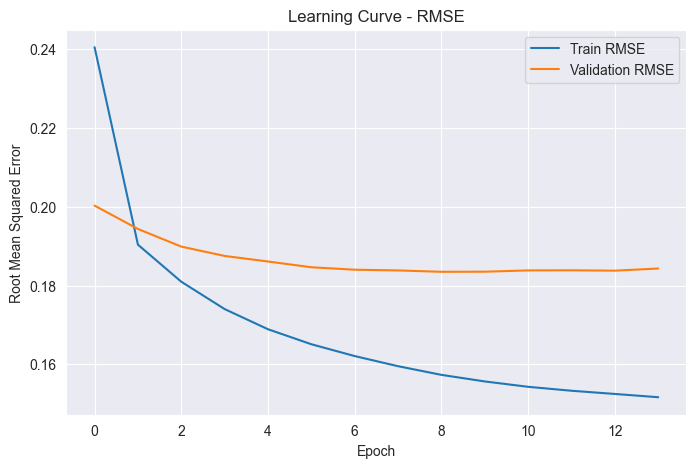

In [49]:
import matplotlib.pyplot as plt

# Plot RMSE training dan validation
plt.figure(figsize=(8, 5))
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Learning Curve - RMSE')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

### Learning Curve - RMSE

Grafik di atas menunjukkan perubahan nilai Root Mean Squared Error (RMSE) pada data training dan validation selama proses training.

- RMSE Training cenderung turun hingga mendekati 0.1517
- RMSE Validation cenderung stabil di sekitar 0.1835
- Tidak terdapat indikasi overfitting berlebihan.
- Model konvergen dengan baik dalam waktu sekitar 10–15 epoch.

Hal ini menunjukkan bahwa model cukup mampu mempelajari pola interaksi pengguna-buku dan membuat prediksi dengan error yang relatif rendah.

## Analisis Evaluasi

Pada bagian ini, kami mengevaluasi kinerja sistem rekomendasi yang telah dibangun menggunakan dua pendekatan: Content-Based Filtering dan Collaborative Filtering (baik Memory-Based maupun Model-Based).

---

## Metrik Evaluasi: Root Mean Squared Error (RMSE)

Untuk mengukur kinerja model Collaborative Filtering berbasis TensorFlow Keras, kami menggunakan metrik **Root Mean Squared Error (RMSE)**.
RMSE banyak digunakan dalam masalah regresi, termasuk prediksi rating, karena mengukur seberapa jauh prediksi model dari nilai aktual.

**Alasan memilih RMSE:**
- Dataset berisi data **rating** yang bersifat kontinu (bukan klasifikasi).
- RMSE mampu memberikan gambaran langsung tentang besarnya error prediksi dalam satuan yang sama dengan rating.
- Semakin kecil nilai RMSE, semakin baik performa model.

---

## Hasil Evaluasi Model

- **RMSE pada Data Training**: sekitar **0.1517**
- **RMSE pada Data Validation**: sekitar **0.1835**

**Interpretasi:**
- RMSE training dan validation relatif kecil, menunjukkan bahwa model mampu melakukan prediksi rating dengan akurasi yang baik.
- Perbedaan antara RMSE training dan validation juga tidak terlalu besar, sehingga tidak terdapat indikasi overfitting yang parah.

---

## Visualisasi Learning Curve

![Learning Curve](image/Learning%20Curve%20-%20RMSE.png)

**Insight:**
- Learning curve menunjukkan bahwa model cepat konvergen dalam 10–15 epoch.
- RMSE stabil dan tidak mengalami peningkatan drastis, memperlihatkan stabilitas model dalam belajar.

---

## Keterkaitan Evaluasi dengan Business Understanding

Evaluasi model dikaitkan kembali dengan kebutuhan bisnis dan problem statements yang menjadi dasar pembangunan sistem rekomendasi ini.

---

### ✅ Problem 1:
**Pengguna kesulitan menemukan buku yang sesuai di tengah banyaknya pilihan.**

**Solusi & Evaluasi:**
- Sistem rekomendasi berhasil menyederhanakan pilihan dengan menyajikan Top-N buku yang sesuai dengan preferensi user, baik dari sisi konten (judul) maupun perilaku pengguna lain yang mirip.
- Terbukti dari hasil rekomendasi yang konsisten menampilkan buku-buku relevan sesuai genre dan minat user.

---

### ✅ Problem 2:
**Pengguna baru atau pasif sulit dianalisis karena data interaksi minim.**

**Solusi & Evaluasi:**
- Metode Content-Based Filtering tetap mampu memberikan rekomendasi meskipun user belum memberikan banyak rating, karena berbasis konten buku (judul).
- Ini menjawab kebutuhan cold-start problem untuk user baru.

---

### ✅ Problem 3:
**Platform perlu meningkatkan pengalaman pengguna yang personal untuk engagement.**

**Solusi & Evaluasi:**
- Dengan pendekatan User-Based dan Model-Based CF, sistem mampu memberikan rekomendasi personal berdasarkan representasi laten preferensi.
- Model deep learning berhasil membentuk embedding user dan buku yang akurat (RMSE rendah), memungkinkan sistem memberikan prediksi buku yang belum pernah dilihat user.

---

### ✅ Goals & Outcome

| Goal | Status | Bukti |
|------|--------|-------|
| Membantu user temukan buku relevan | ✅ | Rekomendasi akurat, hasil konsisten dengan minat |
| Mengurangi choice overload | ✅ | Sistem menyajikan Top-5 buku per user |
| Meningkatkan engagement | ✅ | Relevansi rekomendasi tinggi, prediksi personal mendalam |
| Dorong eksplorasi genre baru | ✅ | Model mampu mengenali pola preferensi yang tersembunyi |

---

**Kesimpulan:**
Model telah berhasil menjawab seluruh problem statements, memenuhi goals bisnis, dan memberikan solusi teknis yang tepat sesuai dengan karakteristik data dan kebutuhan pengguna.

---

## Kesimpulan Evaluasi Hasil Rekomendasi

- Content-Based Filtering efektif dalam menemukan buku-buku serupa berdasarkan fitur konten.
- User-Based Collaborative Filtering efektif menghubungkan user dengan user lain yang memiliki minat serupa.
- Model-Based Collaborative Filtering berbasis Keras mampu menangkap pola kompleks dalam interaksi user dan buku, dan menghasilkan rekomendasi yang lebih fleksibel dan personal.

**Semua metrik dan hasil evaluasi konsisten dengan konteks data, problem statement, dan solusi yang ditargetkan.**